<a href="https://colab.research.google.com/github/ishantinsights/hypothesis-testing/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

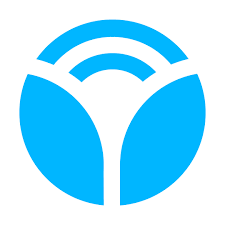

# **Problem Statement:**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Column Profiling:
● datetime: datetime

● season: season (1: spring, 2: summer, 3: fall, 4: winter)

● holiday : whether day is a holiday or not

● workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

● weather:
o 1: Clear, Few clouds, partly cloudy

o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds

o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

● temp: temperature in Celsius

● atemp: feeling temperature in Celsius

● humidity: humidity

● windspeed: wind speed

● casual: count of casual users

● registered: count of registered users

● count: count of total rental bikes including both casual and registered
_________________________________________________________________________

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe
the electric cycle demands

In [92]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [93]:
# Loading the dataset
yulu=pd.read_csv("/content/yulu.txt")

# **SECTION 1 : Basic Data Checks**


1.   Shape of data
2.   Missing data
3.   Duplicate Rows
4.   Data type
5.   Converting Numerical Columns into Cateogry Columns



In [94]:
# Checking the shape of the dataset
yulu.shape

(10886, 12)

In [95]:
# Checking for missing data
missing=yulu.isna().sum().sum()
print("Dataset has {} missing values".format(missing))

Dataset has 0 missing values


In [96]:
# Checking for duplicate rows
duplicate=yulu.duplicated().sum()
print("Dataset has {} duplicate rows".format(duplicate))

Dataset has 0 duplicate rows


In [97]:
# Displaying information about the datase
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [98]:
# lets convert season column to category spring, summer ,fall,winter
def season(x):
  if x==1:
    return 'Spring'
  elif x==2:
    return "Summer"
  elif x==3:
    return "Fall"
  else:
    return "Winter"

yulu['season_category']=yulu['season'].apply(season)
yulu['season_category'].value_counts()

season_category
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

In [99]:
# lets convert weather column to category
def weather(x):
  if x==1:
    return 'Clear'
  elif x==2:
    return "Mist"
  elif x==3:
    return "Light Rain"
  else:
    return "Heavy Rain"

yulu['weather_category']=yulu['weather'].apply(weather)

In [100]:
#Function to convert numerical workingday values to categorical day names
def working_day(x):
  if x ==1:
    return 'weekday'
  else:
    return "weekend"


yulu['day_category']=yulu['workingday'].apply(working_day)


In [101]:
#Function to convert numerical holiday values to categorical 'Yes' or 'No'
def holiday(x):
  if x ==1:
    return 'Yes'
  else:
    return "No"


yulu['holiday']=yulu['holiday'].apply(holiday)

In [102]:
# Reordering the columns for better readability
yulu_final=yulu.reindex(columns=['datetime','holiday','season_category','weather_category','day_category','temp','atemp','humidity','windspeed','casual','registered','count'])

In [103]:
yulu_final.head()

,datetime,holiday,season_category,weather_category,day_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,No,Spring,Clear,weekend,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,No,Spring,Clear,weekend,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,No,Spring,Clear,weekend,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,No,Spring,Clear,weekend,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,No,Spring,Clear,weekend,9.84,14.395,75,0.0,0,1,1


In [104]:
# Converting the 'datetime' column to datetime format
yulu_final['datetime']=pd.to_datetime(yulu_final['datetime'])

# Extracting month and year from the 'datetime' column
yulu_final['month']=yulu_final['datetime'].dt.month
yulu_final['year']=yulu_final['datetime'].dt.year


In [105]:
yulu_final.describe() # Displaying descriptive statistics of the dataset

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,month,year
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,2011.501929
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2011.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,2011.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,2012.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,2012.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,2012.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,0.500019


# **Section 2 - EDA**
2.1. Univariate Analysis

2.2. Bivariate Analysis

# **2.1 UNIVARIATE ANALYSIS**

<Axes: ylabel='proportion'>

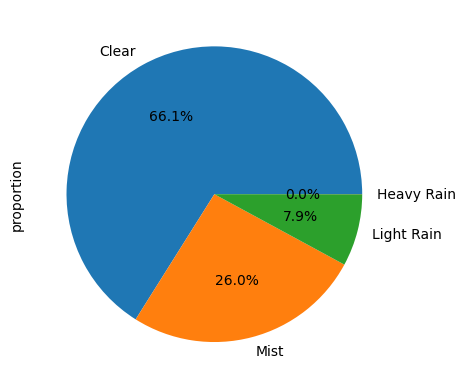

In [106]:
# Visualizing the distribution of weather categories
yulu_final['weather_category'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<font color=pink>Observation:
66% of the users take rental bike when weather is clear

<Axes: ylabel='proportion'>

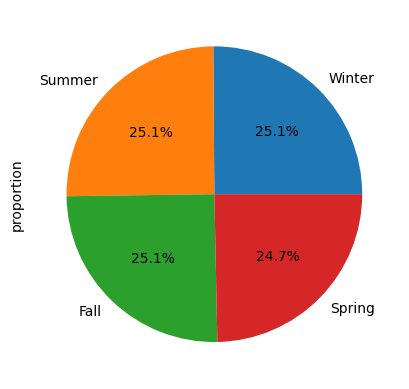

In [107]:
# Visualizing the distribution of season categories
yulu_final['season_category'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<font color=pink>Observation:
Demand of rental electric bikes is more or less similar in all the seasons

<Axes: ylabel='proportion'>

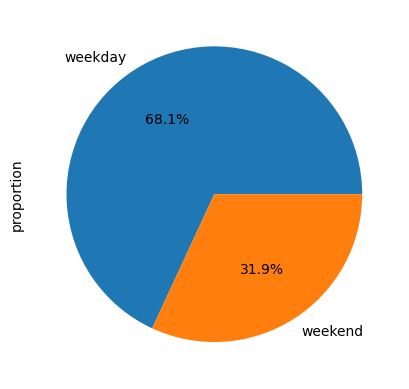

In [108]:
# Visualizing the distribution of day categories
yulu_final['day_category'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

<font color=pink>Observation:
~ 70% of the users take electric bike on rent on weekday

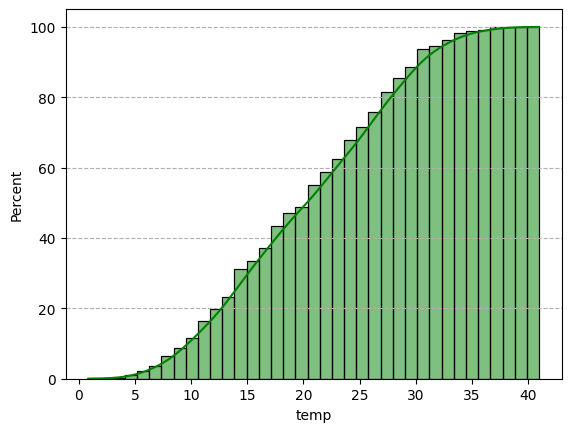

In [109]:
# Visualizing the cumulative distribution of temperature
sns.histplot(data=yulu_final,x='temp',cumulative=True,stat='percent',kde=True,color='green')
plt.grid(axis = 'y', linestyle = '--')

<font color=pink>Observation:
The above graph depicts that 80% of the times temp is less than ~28 degrees

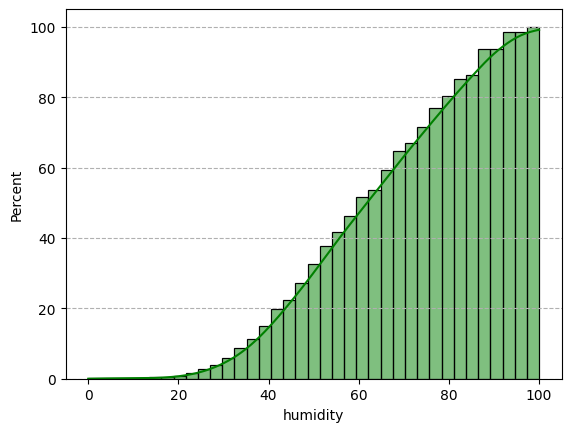

In [110]:
# Visualizing the cumulative distribution of humidity
sns.histplot(data=yulu_final,x='humidity',cumulative=True,stat='percent',kde=True,color='green')
plt.grid(axis = 'y', linestyle = '--')

<font color=pink>Observation:
80% of the times humidity is below 80


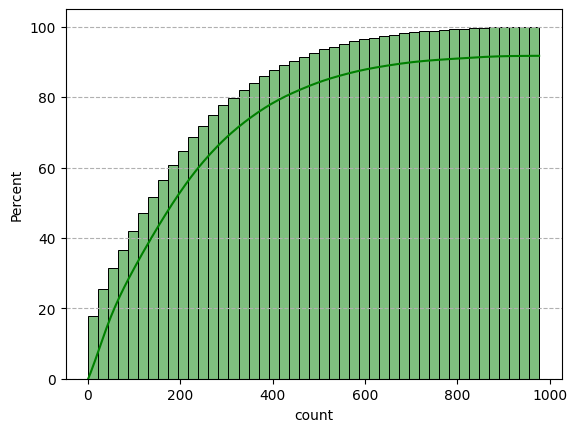

In [111]:
# Visualizing the cumulative distribution of count
sns.histplot(data=yulu_final,x='count',cumulative=True,stat='percent',kde=True,color='green')
plt.grid(axis = 'y', linestyle = '--')

<font color=pink>Observation:
80% of the times count of electric bikes rented  on any given day is less than or equal to 380

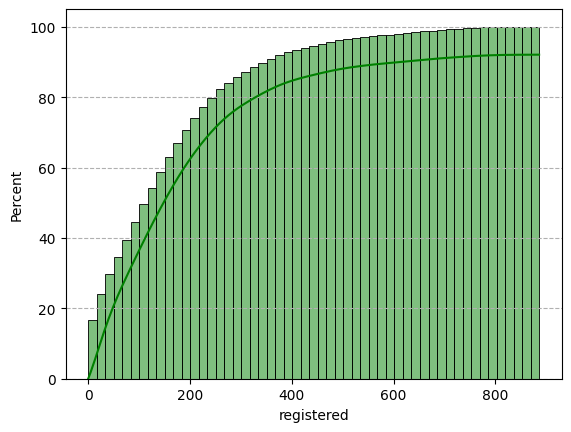

In [112]:
# Visualizing the cumulative distribution of registered users
sns.histplot(data=yulu_final,x='registered',cumulative=True,stat='percent',kde=True,color='green')
plt.grid(axis = 'y', linestyle = '--')

<font color=pink>Observation:
80% of the times registered users are less than or equal to 300 on any given day

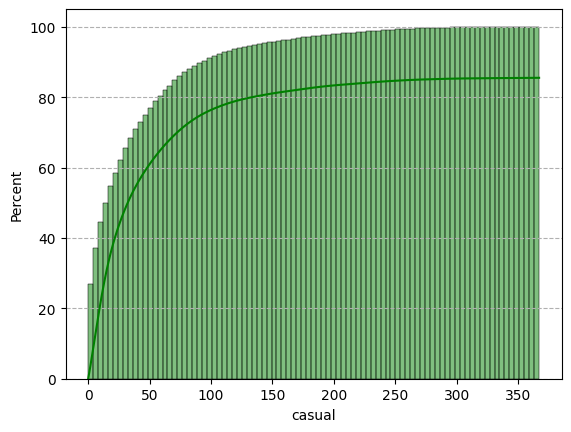

In [113]:

# Visualizing the cumulative distribution of casual users
sns.histplot(data=yulu_final,x='casual',cumulative=True,stat='percent',kde=True,color='green')
plt.grid(axis = 'y', linestyle = '--')

<font color=pink>Observation:
89% of the times casual users are less than or equal to 120 on any given day

<Axes: xlabel='count', ylabel='Count'>

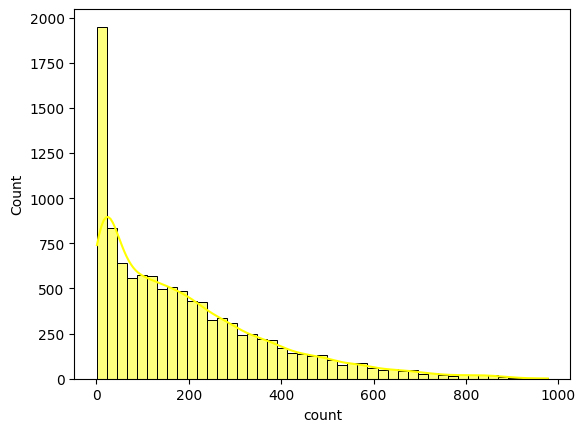

In [114]:
# Visualizing the distribution of count
sns.histplot(data=yulu_final,x='count',kde=True,color='yellow')

<Axes: ylabel='count'>

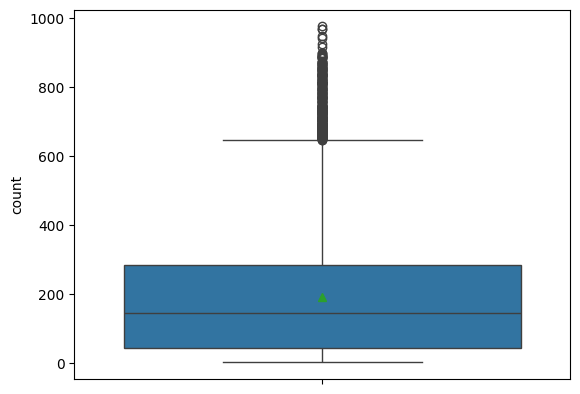

In [115]:
# Visualizing the boxplot of count
sns.boxplot(data=yulu_final,y='count',showmeans=True)

<font color=pink>Observation:
Median no of electric bikes rented is ~120 with 50% of the count of bikes rented between 50 to 250 nos

In [116]:
# Handling outliers by removing values beyond upper and lower bounds
lower1=yulu_final['count'].quantile(0.05)
upper1=yulu_final['count'].quantile(0.95)

In [117]:
# Calculating the first and third quartile for count
Q3=yulu_final['count'].quantile(0.75)
Q1=yulu_final['count'].quantile(0.25)
IQR=Q3-Q1 # Calculating the Interquartile Range (IQR)

In [118]:
upper=Q3+(1.5*IQR)# Determining the lower and upper bounds for outlier detection
lower=Q1-(1.5*IQR)


In [119]:
upper

647.0

In [120]:
lower

-321.0

In [121]:
yulu_final=yulu_final[~(yulu_final['count']>upper)| (yulu_final['count']<lower)] # outlier treatment


# **2.2 BIVARIATE ANALYSIS**

Slcing the datetime column

In [122]:
# Month wise trend of casual users and registered users
trend=yulu_final.groupby(['month']).agg (avg_casual_users=('casual','mean'),avg_registered_users=('registered','mean')).reset_index()

In [123]:
trend=trend.set_index('month')


Text(0.5, 1.0, 'Average no of casual and registered users month wise')

<Figure size 1200x600 with 0 Axes>

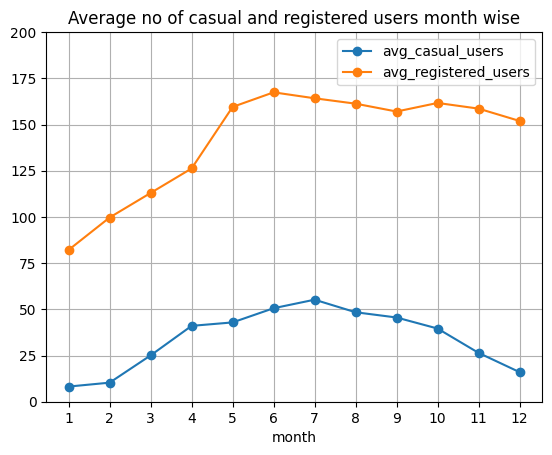

In [124]:
plt.figure(figsize = (12, 6))
trend.plot(kind='line',ylim=(0,200),marker='o')
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title("Average no of casual and registered users month wise")




<font color=pink>Observation:
Avgerage no of registered users are more as compared to casual users month on month. That implies that yulu should focus on registered users as they are the main revenue drivers and users of yulu bikes


How does the average  count of rental bikes varies for different month ?


In [125]:
month_count=yulu_final.groupby('month')['count'].mean().reset_index()
month_count['prev_count']=month_count['count'].shift(1)
month_count['percent_change']=(month_count['count']-month_count['prev_count'])*100.0/month_count['prev_count']
month_count

,month,count,prev_count,percent_change
0,1,90.366516,NaN,NaN
1,2,110.003330,90.366516,21.730188
2,3,138.040678,110.003330,25.487727
3,4,167.282633,138.040678,21.183579
4,5,202.437146,167.282633,21.015040
5,6,218.017241,202.437146,7.696263
6,7,219.409040,218.017241,0.638389
7,8,209.696101,219.409040,-4.426863
8,9,202.606977,209.696101,-3.380666
9,10,201.269805,202.606977,-0.659983


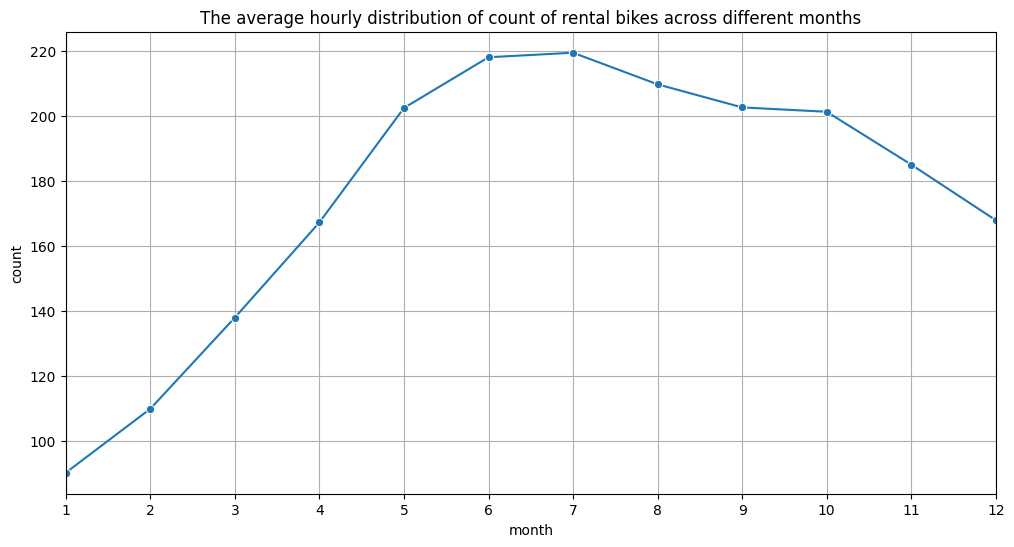

In [126]:
# Visualizing the average count by month
plt.figure(figsize = (12, 6))
sns.lineplot(data=month_count,x='month',y='count',marker = 'o')
plt.xlim(1,12)
plt.xticks(np.arange(1,13))
plt.title("The average hourly distribution of count of rental bikes across different months")
plt.grid(axis='both')


<font color=pink>Observation:From January to March, the number of rental bikes increased, with a notable 25% growth rate between February and March.



<font color=pink>Between April and June, the growth rate begins to stabilize at a comparatively lower growth rate.

<font color=pink>There is a minor decline in the number of rental bikes from July to September, with negative growth rates.
<font color=pink>From October through December, the count decreases even more, with the biggest decrease (-9%), occurring between October and November.

<font color=pink>The average hourly count of rental bikes is the highest in the month of June followed by July and August.

<font color=pink>January has the lowest average hourly count of rental bikes, with February and March following closely behind.

<font color=pink>All things considered, these patterns point to a seasonal pattern in the number of rental bikes, with demand being highest in the spring and summer, declining slightly in the fall, and then declining much more in the winter. The rental bike company might find it helpful to take these trends into account when allocating resources, developing marketing plans, and organizing daily operations.

What is the distribution of average count of rental bikes on an hourly basis in a single day ?

In [127]:
yulu_final['hour']=yulu_final['datetime'].dt.hour #Extracting the hour from the datetime column
hour_group=yulu_final.groupby('hour')['count'].mean().reset_index()
# Grouping the data by hour and calculating the mean count
hour_group['prev_hour']=hour_group['count'].shift(1) # Shifting the count values by one hour to calculate percent change
 # Calculating the percent change in count compared to the previous hour
hour_group['percent_change']=(hour_group['count']-hour_group['prev_hour'])*100.0/hour_group['prev_hour']
hour_group

,hour,count,prev_hour,percent_change
0,0,55.138462,NaN,NaN
1,1,33.859031,55.138462,-38.592718
2,2,22.899554,33.859031,-32.367959
3,3,11.757506,22.899554,-48.656179
4,4,6.407240,11.757506,-45.505110
5,5,19.767699,6.407240,208.521293
6,6,76.259341,19.767699,285.777526
7,7,213.116484,76.259341,179.462793
8,8,293.411609,213.116484,37.676638
9,9,221.780220,293.411609,-24.413277


<font color=pink>Observation:
During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.

<font color=pink>However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
<font color=pink>The count continues to rise significantly until reaching its peak at hour 17, with a growth percentage of 23% compared to the previous hour.

<font color=pink>After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -6% to -32.99% during the late evening and nighttime hours

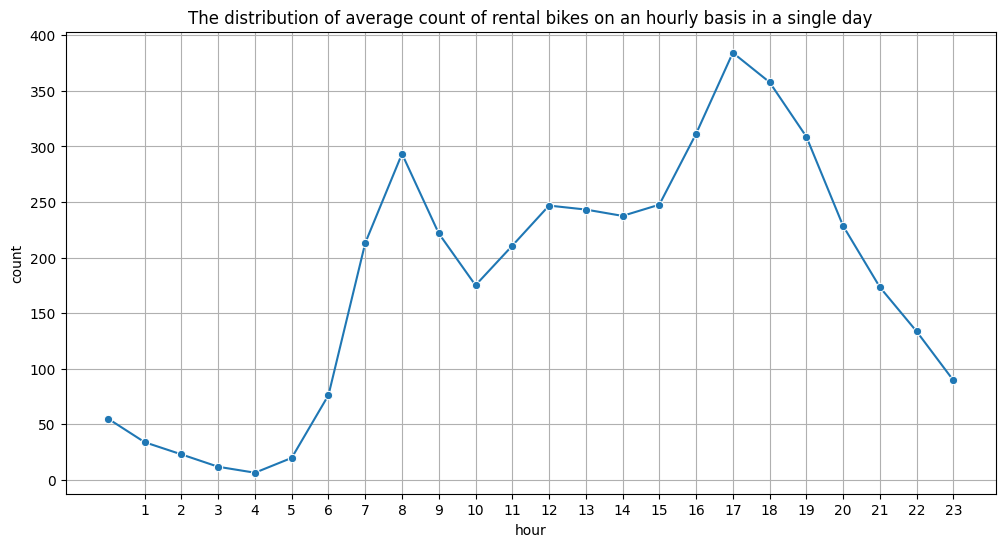

In [128]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hour_group,x='hour',y='count',marker = 'o')
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
plt.xticks(np.arange(1,24))
plt.grid(axis='both')

<font color=pink>Observation: These trends show that counts vary significantly during the day, peaking in the afternoon, gradually declining in the evening and at night, and being at their lowest in the early morning, morning, and evening hours..

In [129]:
group2_season=yulu_final.groupby('season_category').agg (avg_no_of_users=('count','mean')).reset_index() # group by season and taking avg of electirc bikes rented in a particular season

<Axes: ylabel='season_category'>

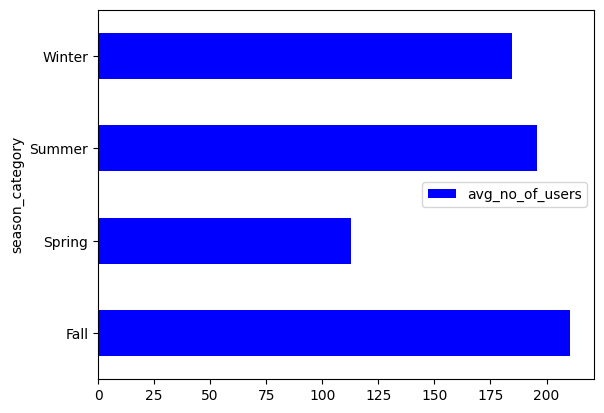

In [130]:
group2_season.set_index('season_category').plot(kind='barh',color='blue')

<font color= pink>Observation:
The demand of rental bikes in more or less same across all the season category except slight drop in spring

In [131]:
group3_weather=yulu_final.groupby('weather_category').agg (avg_no_count=('count','mean')).reset_index() # group by weather category and taking avg count of electric bikes rented

<Axes: ylabel='weather_category'>

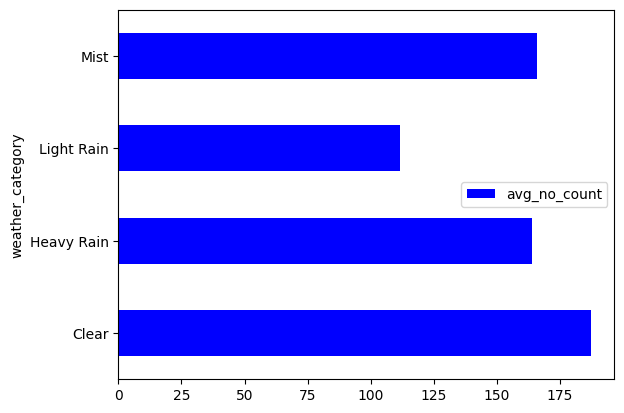

In [132]:
group3_weather.set_index('weather_category').plot(kind='barh',color='blue')

In [133]:
yulu_final[['casual','registered']].corr()

,casual,registered
casual,1.000000,0.513744
registered,0.513744,1.000000


<Axes: xlabel='casual', ylabel='registered'>

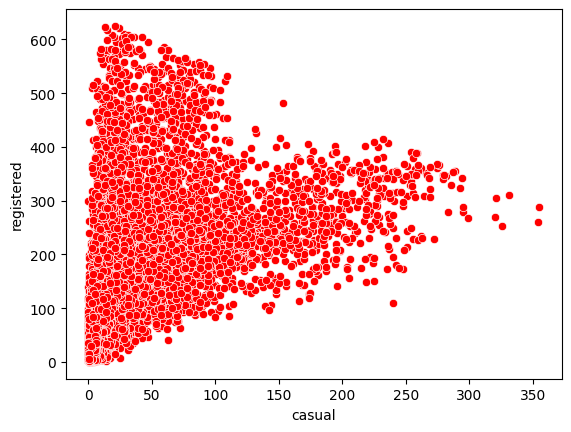

In [134]:
# Creating a scatter plot to visualize the relationship between 'casual' and 'registered' variables
sns.scatterplot(data=yulu_final,x='casual',y='registered',color='red')

In [135]:
group4_day=yulu_final.groupby('day_category').agg (avg_count=('count','mean')).reset_index() # group by day category and taking avg count of electric bikes rented

<Axes: ylabel='day_category'>

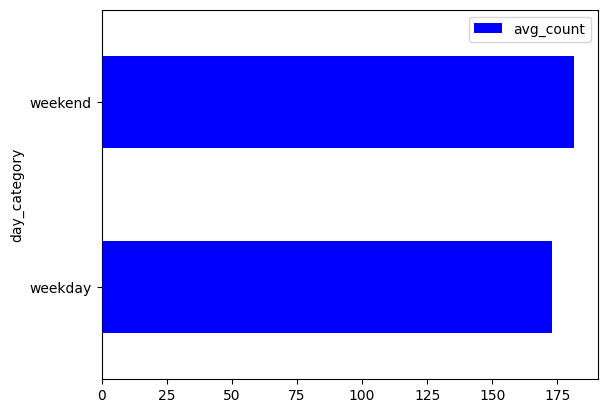

In [136]:
group4_day.set_index('day_category').plot(kind='barh',color='blue')

In [137]:
corr=yulu_final.corr(method='spearman',numeric_only=True)

<Axes: >

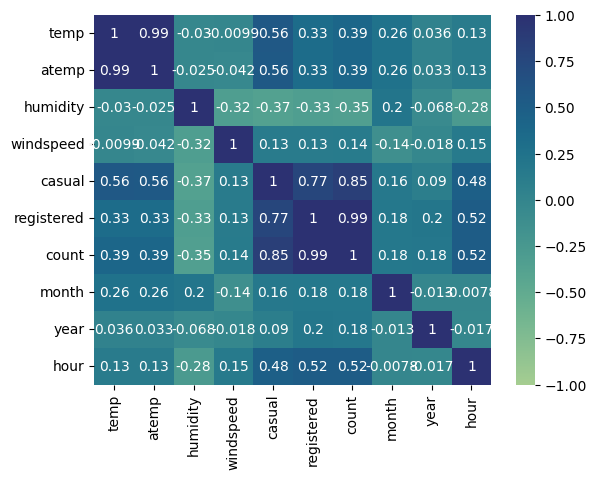

In [138]:
# Creating a heatmap to visualize the correlation matrix
# cmap="crest" specifies the color map to be used
# annot=True displays the correlation values on the heatmap
# vmin=-1 and vmax=1 set the range of values for the color map
sns.heatmap(data=corr,cmap="crest",annot=True,vmin=-1, vmax=1)

<font color=pink>Observation:
Positive correlation between registered and casual users , means increase in casual also leads to incease in registered users

<font color=pink>Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]

<font color=pink>Negligible correlation exists between all other combinations of columns

# **3. HYPOTHESIS TESTING**

Dependant variable= Count column in the data
Significance level aplha= 5%

# **1.) Is there any effect of day category( weekend/weekday) on the number of electric bikes rented**



In [139]:
yulu_final.groupby('day_category')['count'].mean() # calculated the mean to check the avg count of bikes being rented on weekday/weekend

day_category
weekday    173.011591
weekend    181.373723
Name: count, dtype: float64

<font color=pink>Observation:
From the above calcualtion it seems that **rental bike demand is non dependant on the weekend or weekday** as the average count of rental bikes  is almost same but  let's test this using hypothesis

Setting up the test:

<font color=orange>***Step 1: Hypothesis Framing***


1.   Ho: Average no of bikes being rented on weekday and weekend is similar μ1 = μ2 i.e no significant affect of weekend and weekday on the demand of electric bikes
2.   Ha: Weekend or weekday  does  have  significant effect on the count of electric bikes rented i.e Average no of bikes being rented on weekday and weekend is not same μ1 ≠ μ2

<font color=orange>***Step 2:*** ***Checking for assumptions of test such as checking for normal distribution using qq plot and variance test using levene test***

In [140]:
from statsmodels.graphics.gofplots import qqplot # for checking the normal distribution

In [141]:
# Filtering the dataframe to include only entries for weekdays
weekday=yulu_final[yulu_final['day_category']=='weekday']
# Extracting the 'count' column for weekdays
weekday_count=weekday['count']

# Filtering the dataframe to include only entries for weekends
weekend=yulu_final[yulu_final['day_category']=='weekend']
# Extracting the 'count' column for weekends
weekend_count=weekend['count']

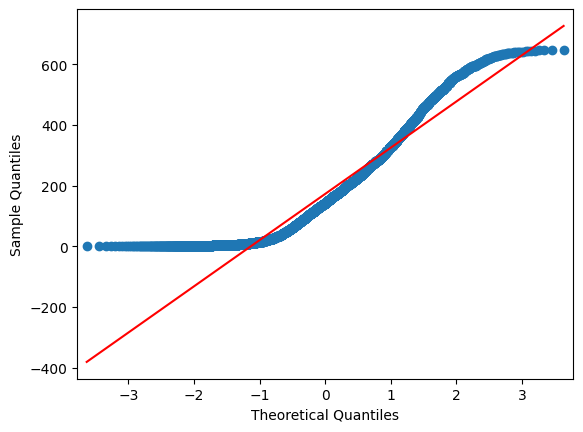

In [142]:
qqplot(weekday_count,line='s'); # to check the normal distribution


<font color=pink>Observation:
From the above graph it is evident that distribution is not normal

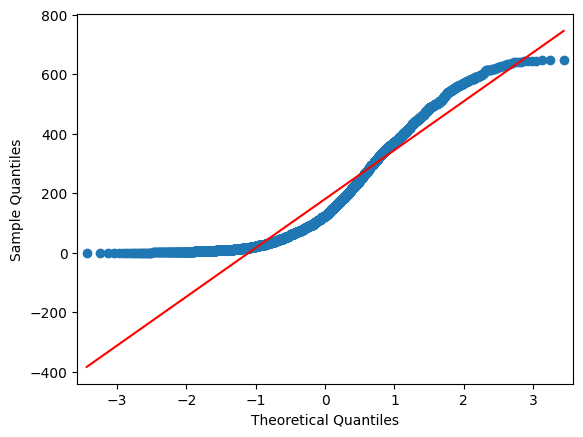

In [143]:
qqplot(weekend_count,line='s'); # to check the normal distribution

<font color=pink>Observation:
From the above graph it is evident that distribution is not normal

In [144]:
# for variance assumption we will use levene test
from scipy.stats import levene
# Performing Levene's test to compare the variance of 'count' between weekdays and weekends
levene(weekday_count,weekend_count)

LeveneResult(statistic=26.147070184499576, pvalue=3.219098783658039e-07)

<font color=pink>observation:
As p value is grater than alpha so that means variance of two groups(weekday and weekend ) is equal

<font color=orange>***Step 3 : Defining the test statistic***

<font color=orange>***As we are testing 2 samples effect(weekend/weekday) on numerical column(count) we will use T independent test . <font color=orange>Although the distribution is not normal but since we are using sample size greater than 30 ,so we will go ahead with t test***


In [145]:
from scipy.stats import ttest_ind

t_stat,p_val=ttest_ind(weekday_count,weekend_count) # we will go with two tailed test as our alternate hypothesis is μ1 ≠ μ2
#as the size of both the groups is greater than 30  we will go ahead with T test

In [146]:
t_stat,p_val

(-2.5748856400481515, 0.010040780184497066)

<font color=orange>***Step 4: Compare p-value and alpha***

In [147]:
alpha=0.05
if p_val>alpha:
  print("Fail to reject Ho and weekend/weekday has no effect on count of electric bikes being rented and no dependency on weekend/weekday") # p value > alpha accept HO
else:
  print("Reject Ho and weekday/weekend has effect on count of electric bikes being rented") # p value less than alpha accept Ha

Reject Ho and weekday/weekend has effect on count of electric bikes being rented


# **2.)  Is there any effect of different weather conditions on the number of electric bikes rented**

In [148]:
# Grouping the DataFrame by 'weather_category' to analyze the impact of weather on bike rentals
# Calculating the mean count of electric bikes rented for each weather category
yulu_final.groupby('weather_category')['count'].mean()

weather_category
Clear         187.329218
Heavy Rain    164.000000
Light Rain    111.862353
Mist          166.117690
Name: count, dtype: float64

As seen from the above it seems that number of electric bikes being rented is dependant on weather , lets test this using hypothesis testing

<Axes: ylabel='count'>

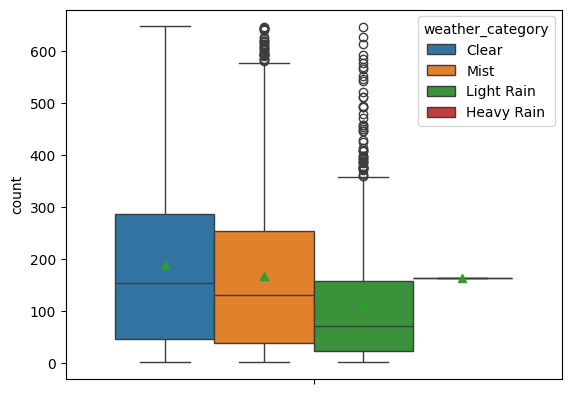

In [149]:
# Creating a boxplot to visualize the distribution of bike rentals count based on weather categories
# Showcasing the median, quartiles, outliers, and means for each weather category
sns.boxplot(data=yulu_final,y='count',hue='weather_category',showmeans=True)

Dependant variable= Count column in the data

Significance level alpha= 5%

<font color=orange>***Step 1 : Setting up null and alternate hypothesis***


<font color=orange>null hypothesis- Ho : There is no significant difference in average number of bikes being rented across different weather conditions i.e same across all the weather category groups  μ1 = μ2 = μ3 = μ4


<font color=orange>alternate hypothesis - Ha : There is significant difference in average number of bikes being rented across atleast one group i.e  at least one of the means is different


<font color=orange>***Step 2: Checking for assumptions of test such as checking for normal distribution using shapiro wilk test and variance test using levene test***

In [150]:
# Filtering data based on weather categories to analyze bike rental counts
# Separating data for 'Clear', 'Mist', 'Light Rain', and 'Heavy Rain' weather condition
clear=yulu_final[yulu_final['weather_category']=='Clear']
clear_count=clear['count']
mist=yulu_final[yulu_final['weather_category']=='Mist']
mist_count=mist['count']
light_rain=yulu_final[yulu_final['weather_category']=='Light Rain']
light_rain_count=light_rain['count']
heavy_rain=yulu_final[yulu_final['weather_category']=='Heavy Rain']
heavy_rain_count=heavy_rain['count']

In [151]:
# Checking the normality of the sample data for bike rental counts during 'Clear' weather using the Shapiro-Wilk test
shapiro(clear_count.sample(100)) # Ho : Normal Distribution  , Ha : Not a normal distribution

ShapiroResult(statistic=0.9227503538131714, pvalue=1.9754083041334525e-05)

In [152]:
shapiro(mist_count.sample(100)) # p value is less than alpha so data is not normal distribution

ShapiroResult(statistic=0.9243457317352295, pvalue=2.411496279819403e-05)

In [153]:
shapiro(light_rain_count.sample(100)) # p value is less than alpha so data is not normal distribution

ShapiroResult(statistic=0.8200100064277649, pvalue=1.0702728703293474e-09)

Check for variance using levene test

In [154]:
levene(clear_count,mist_count,light_rain_count,heavy_rain_count) # p value is less than alpha so variance b/w group is not equal

LeveneResult(statistic=58.699303151914386, pvalue=1.2566715363063703e-37)


<font color=orange>***Step 3: Test type: As the comparison is between more than 2 categories and one numerical variable we will use one way anova . Alhtough the assumption of test is failing but we will continue with the test***

In [155]:
from scipy.stats import f_oneway,kruskal

In [156]:
# Performing one-way ANOVA test to determine if there's a significant difference in bike rental counts among different weather categories
f_stat,pvalue=f_oneway(clear_count,mist_count,light_rain_count,heavy_rain_count)
pvalue

1.9325292098052954e-41


<font color=orange>***Step 4 : Checking P value***


In [157]:
if pvalue>alpha:
  print("Fail to reject Ho and there is no significant difference in the avg number of bikes being rented across different weather i.e count of bikes is non dependent on weather")
else:
  print("Reject Ho and there is significant difference in the avg number of bikes being rented in atleast one weather group i.e demand of bikes is dependent on weather")


Reject Ho and there is significant difference in the avg number of bikes being rented in atleast one weather group i.e demand of bikes is dependent on weather


In [158]:
# as the assumptions of one way anova failed , let us see what results we get with non parametric test Kruskal's

In [159]:
# Performing Kruskal-Wallis H-test to determine if there's a significant difference in bike rental counts among different weather categories
kruskal(clear_count,mist_count,light_rain_count,heavy_rain_count) # same result we are getting reject Ho as p value < alpha

KruskalResult(statistic=187.56969292419032, pvalue=2.0444534638690485e-40)

# **3.) Is there any effect of different season on the number of electric bikes rented i.e check if the demand of bicycles on rent is the same for different Seasons?**

In [160]:
# Calculating the average bike rental counts for each season category
yulu_final.groupby('season_category')['count'].mean()

season_category
Fall      210.651127
Spring    112.795131
Summer    195.824981
Winter    184.578236
Name: count, dtype: float64


<font color=pink>Observation:As seen from the above it seems that number of electric bikes being rented is dependant on season , lets test this using hypothesis testing

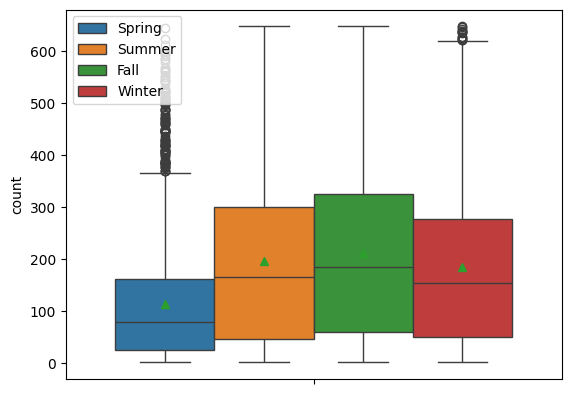

In [161]:
# Creating a boxplot of bike rental counts categorized by season, with mean markers shown and a legend added
sns.boxplot(data=yulu_final,y='count',hue='season_category',showmeans=True)
plt.legend(loc='upper left')

<font color=pink>Observation:The above plot suggests that there might be connection between season category and bikes being rented , we will test this using hypothesis testing

Dependant variable= Count column in the data

Significance level alpha= 5%

<font color=orange>***Step 1 : Setting up null and alternate hypothesis***

<font color=orange>null hypothesis- Ho : There is no significant difference in average number of bikes being rented across different seasons i.e same across all the seasons category groups μ1 = μ2 = μ3 = μ4

<font color=orange>alternate hypothesis - Ha : There is significant difference in average number of bikes being rented across atleast one season group i.e at least one of the means is different

<font color=orange>***Step 2: Checking for assumptions of test such as checking for normal distribution using shapiro wilk test/qq plot and variance test using levene test***

In [162]:
yulu_final.head()

,datetime,holiday,season_category,weather_category,day_category,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour
0,2011-01-01 00:00:00,No,Spring,Clear,weekend,9.84,14.395,81,0.0,3,13,16,1,2011,0
1,2011-01-01 01:00:00,No,Spring,Clear,weekend,9.02,13.635,80,0.0,8,32,40,1,2011,1
2,2011-01-01 02:00:00,No,Spring,Clear,weekend,9.02,13.635,80,0.0,5,27,32,1,2011,2
3,2011-01-01 03:00:00,No,Spring,Clear,weekend,9.84,14.395,75,0.0,3,10,13,1,2011,3
4,2011-01-01 04:00:00,No,Spring,Clear,weekend,9.84,14.395,75,0.0,0,1,1,1,2011,4


In [163]:
# Filtering data for each season category and extracting count data
spring=yulu_final[yulu_final['season_category']=='Spring']
spring_count=spring['count']
summer=yulu_final[yulu_final['season_category']=='Summer']
summer_count=summer['count']
fall=yulu_final[yulu_final['season_category']=='Fall']
fall_count=fall['count']
winter=yulu_final[yulu_final['season_category']=='Winter']
winter_count=winter['count']

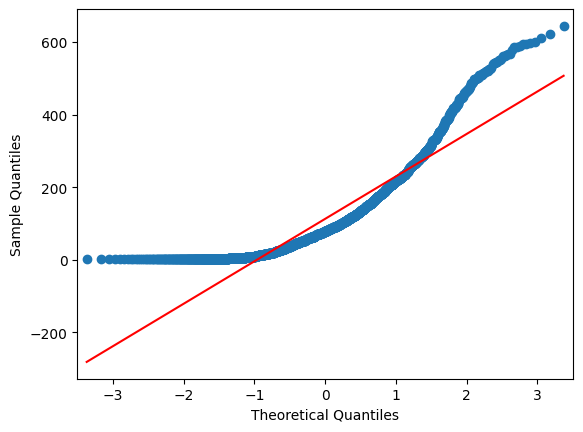

In [164]:
qqplot(spring_count,line='s');

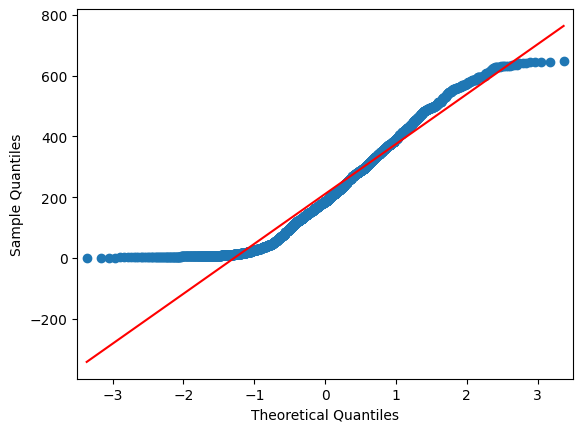

In [165]:
qqplot(fall_count,line='s');

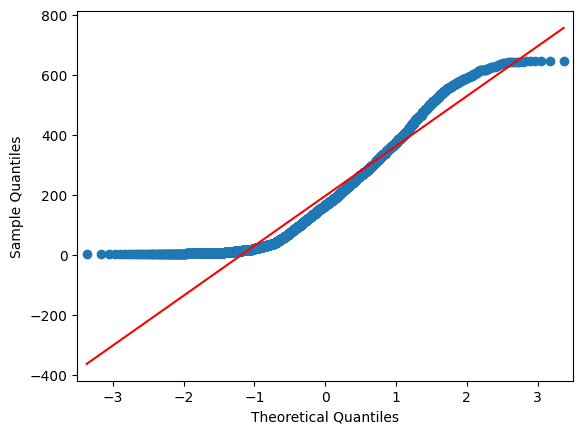

In [166]:
qqplot(summer_count,line='s');

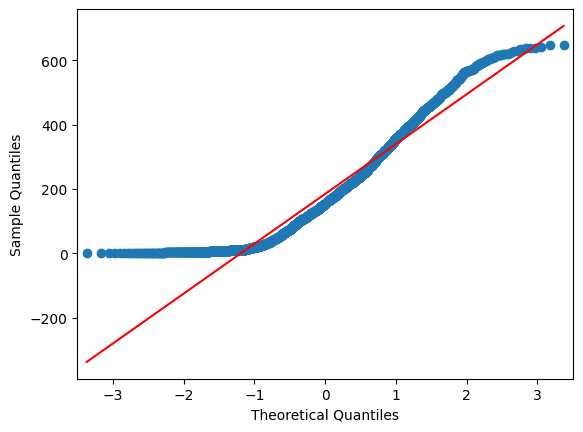

In [167]:
qqplot(winter_count,line='s');

<font color=pink>Observation: From the above graph it it evident that underlying data is not normal distribution





Check for variance using levene test

In [168]:
levene(winter_count,fall_count,summer_count,spring_count) # levene test for variances check

LeveneResult(statistic=177.84047176737857, pvalue=1.6939424019616345e-112)

<font color=pink>Observation: As p value is less than alpha so variances are not equal

<font color=orange>***Step 3: Test type: As the comparison is between more than 2 categories and one numerical variable (i.e count) we will use one way anova . Alhtough the assumption of test is failing but we will continue with the test***

In [169]:
f_stat,Pvalue=f_oneway(winter_count,fall_count,summer_count,spring_count)
Pvalue

5.292326890121564e-137

<font color=orange>***Step 4: Checking P value***

In [170]:
if Pvalue>alpha:
  print("Fail to reject Ho and there is no significant difference in the avg number of bikes being rented across different seasons i.e count of bikes is non dependent on seasons")
else:
  print("Reject Ho and there is significant difference in the avg number of bikes being rented in atleast one of the seasons i.e demand of bikes is dependent on seasons")


Reject Ho and there is significant difference in the avg number of bikes being rented in atleast one of the seasons i.e demand of bikes is dependent on seasons


In [171]:
# as the assumptions of one way anova failed , let us see what results we get with non parametric test Kruskal's

In [172]:
kruskal(winter_count,fall_count,summer_count,spring_count) # same result reject Ho as p value < alpha

KruskalResult(statistic=620.3738431848667, pvalue=3.859195347441971e-134)

# **4.) Is weather dependent on the season?Are Weather conditions significantly different during different Seasons?**

In [173]:
pd.crosstab(yulu_final['weather_category'],yulu_final['season_category'])

season_category,Fall,Spring,Summer,Winter
weather_category,,,,
Clear,1843,1744,1721,1657
Heavy Rain,0,1,0,0
Light Rain,195,211,223,221
Mist,579,714,690,787


In [174]:
# we will remove the weather category Heavy Rain as the data is very less
observed=pd.crosstab(yulu_final['weather_category'][yulu_final['weather_category']!="Heavy Rain"],yulu_final['season_category'])
observed

season_category,Fall,Spring,Summer,Winter
weather_category,,,,
Clear,1843,1744,1721,1657
Light Rain,195,211,223,221
Mist,579,714,690,787


From the above data it seems that season and weather have some connection , lets test this hypothesis

<font color=orange>***Step 1 : Hypothesis Testing***

<font color=orange>Null Hypothesis : Ho : Season and Weather are independent i.e no significant difference in weather conditions during different seasons

<font color=orange>Alternate Hypothesis : Ha: Season and Weather are not independent i.e weather conditions are significantly different during different seasons

<font color=orange>***Step 2: Checking for assumptions of test but since we are performing test between 2 categorical variables so we will perform chi square test and there is no need to check the assumptions as chi square test is robust towards non normal distribution and is non parametric in nature***


In [175]:
from scipy.stats import chi2_contingency
s,p,d,e=chi2_contingency(observed)
p

6.734426550686341e-08

<font color=orange>***Step 3: Check p value***

In [176]:
if p>alpha:
  print("Fail to reject Ho and Season and Weather are independent i.e no significant difference in weather conditions during different seasons")
else:
  print("Reject Ho and Season and Weather are dependent i.e weather conditions are significantly different during different seasons" )

Reject Ho and Season and Weather are dependent i.e weather conditions are significantly different during different seasons


# <font color=pink>**Summary**



**Weather Significantly Affects Demand**

Clear weather seems to be the most favorable condition for renting electric bikes, while light rain has the least favorable conditions

**Seasonal Impact on Rental Demand**

Fall exhibits the highest demand for rental bikes, while spring shows the lowest demand. Understanding seasonal trends can help in resource allocation and marketing strategies.

**Day of the Week Influences Demand**

📅 Weekdays witness higher demand for rental bikes compared to weekends, suggesting a potential weekday commuter market. Targeted promotions or pricing strategies can capitalize on this trend

**Hourly Demand Patterns**
There are distinct fluctuations in bike rental counts throughout the day, with low counts during early morning hours, a peak in the afternoon, and a gradual decline in the evening and nighttime.


<font color=orange>**SUMMARY OF HYPOTHESIS TESTING:**



1)Is there any effect of Working Day on the number of electric cycles rented ?

The mean hourly count of the total rental bikes is statistically similar for both working and non-working days.



2)Is weather dependent on the season ?


Yes season and weather is dependant

3)Is the number of cycles rented is similar or different in different weather ?

Yes significant difference in the avg number of bikes being rented in atleast one weather group i.e demand of bikes is dependent on weather



4)Is the number of cycles rented is similar or different in different season ?

The hourly total number of rental bikes is statistically different for different seasons.


<font color=orange># **Actionable Recommendations:**

🌤️🌥️ Weather-Sensitive Promotions: Implement targeted promotions or discounts during favorable weather conditions, such as clear skies, to incentivize more rentals


🌼🌞Seasonal Marketing Strategies: Design seasonal marketing campaigns tailored to specific weather conditions and user preferences to maximize rental uptake during peak seasons.


🚴‍♀️🔧Optimized Operational Planning: Adjust bike distribution and maintenance schedules based on hourly demand patterns to ensure optimal availability during peak hours.

🚴‍♀️🚴‍♂️User Engagement Initiatives: Leverage insights from correlation analysis to develop personalized user engagement initiatives and loyalty programs, enhancing user satisfaction and retention.

🌦️🌧️Weather-Adaptive Services: Offer weather-responsive services or amenities, such as rain gear during light rain, to enhance user experience and attract more riders during varied weather conditions.



